In [1]:
import tensorflow as tf

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
print(x_train.shape)

(60000, 28, 28)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax'),
])

In [4]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [5]:
r = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3040 - accuracy: 0.9075 - val_loss: 0.1301 - val_accuracy: 0.9604
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1452 - accuracy: 0.9566 - val_loss: 0.1043 - val_accuracy: 0.9691
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1143 - accuracy: 0.9654 - val_loss: 0.1014 - val_accuracy: 0.9701
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0985 - accuracy: 0.9696 - val_loss: 0.0856 - val_accuracy: 0.9747
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0841 - accuracy: 0.9730 - val_loss: 0.0801 - val_accuracy: 0.9764
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0763 - accuracy: 0.9755 - val_loss: 0.0803 - val_accuracy: 0.9754
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0714 - accuracy: 0.9771 - val_loss: 0.0772 - val_accuracy:

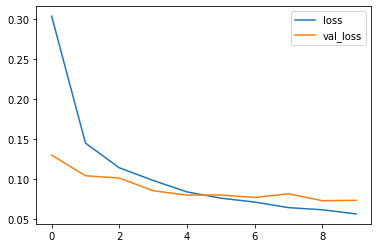

In [6]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

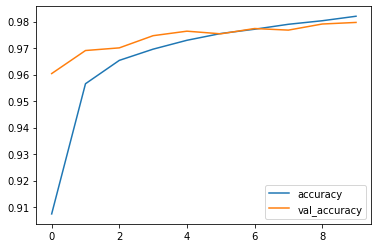

In [7]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [8]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 2s 831us/step - loss: 0.0209 - accuracy: 0.9934


[0.020890338346362114, 0.9934499859809875]

In [9]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 746us/step - loss: 0.0736 - accuracy: 0.9797


[0.07357870042324066, 0.9797000288963318]